In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
import Predicteurs as cl

In [5]:
import Traitement as proc

In [6]:
import imp

In [7]:
import Model_selection as ms

In [8]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import log_loss,accuracy_score,precision_score,recall_score
from sklearn.model_selection import KFold, RepeatedKFold, StratifiedKFold, RepeatedStratifiedKFold

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
from sklearn.metrics import make_scorer

In [11]:
from scipy import stats

In [12]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

In [13]:
HISTOLOGY = "histology"
SEX = "sex"
ID = "id"
AGE = "age"
OS = "Overall survival"
EFS = "Event Free Survival"
PATHOLOGY = "pathology"
DEAD = "dead"

<a id = "featEpiclin"></a>

In [89]:
base = "clcgp"

##### Données cliniques

In [317]:
keep = ['Unnamed: 0','histo','os','efs','dead','os_months']
rename = {"Unnamed: 0":ID,'histo':HISTOLOGY,'os':OS,'efs':EFS,'dead':DEAD}
dropna = [OS,HISTOLOGY]

In [318]:
XpG = proc.refining_expGrp(base=base,keep=keep,rename=rename,dropna_col=dropna)

In [319]:
XpG.to_pickle(base+rf'/XpG_refined.pkl')

On réalise un one-hot encoding sur les variables catégoriques

In [320]:
categorical_columns = [HISTOLOGY]
filename = base+r'/XpG_refined.pkl'

In [321]:
Clinique_OH = proc.OHEncoding(filename,categorical_columns)

In [322]:
Clinique_OH.to_pickle(base+r'/clinique_OH.pkl')

<a id = "featEpiclin"></a>

In [346]:
base = "epilung"

Création des index des patients que l'on utilisera pour la régression

In [348]:
Clinique_OH = pd.read_pickle(base+r'/clinique_OH.pkl')

In [323]:
Index_regression = proc.Create_Patient_Index_Regression(Clinique_OH)

On créé nos dataframes X et Y

In [324]:
X_r = proc.X_transcriptome(base,Index_regression)

In [325]:
X_r_nostd = proc.X_transcriptome(base,Index_regression,standardize=False)

In [326]:
Y_r = proc.Y_clinique(base,Index_regression)

On exporte les X et Y construits

In [327]:
X_r.to_pickle(base+r'/X_regression.pkl')

In [328]:
X_r_nostd.to_pickle(base+r'/X_regression_nostd.pkl')

In [329]:
Y_r.to_pickle(base+r'/Y_regression.pkl')

Création des index des patients que l'on utilisera pour la classification

In [338]:
nmois = 60

In [339]:
Index_classification = proc.Create_Patient_Drop_Index_Classification(Clinique_OH,nmois)

On créé nos dataframes X et Y

In [340]:
X_nmois = proc.X_transcriptome(base,Index_classification)

In [341]:
X_nmois_nostd = proc.X_transcriptome(base,Index_classification,standardize=False)

In [342]:
Y_nmois = proc.Y_clinique(base,Index_classification,nmois)

On exporte les X et Y construits

In [343]:
X_nmois.to_pickle(base+rf'/X_classification-{nmois}.pkl')

In [344]:
X_nmois_nostd.to_pickle(base+rf'/X_classification-{nmois}_nostd.pkl')

In [345]:
Y_nmois.to_pickle(base+rf'/Y_classification-{nmois}.pkl')

In [14]:
X = pd.read_pickle('epilung/X_classification-12.pkl')

In [15]:
Y = pd.read_pickle('epilung/Y_classification-12.pkl')

In [16]:
IndexX = X.iloc[:,0:10].columns

In [23]:
df = IndexX.to_frame()

In [25]:
df.to_pickle('temp.pkl')

In [52]:
df2 = pd.read_pickle('temp.pkl')

In [51]:
IndexX.to_frame().to_pickle('temp.pkl')

In [17]:
l = RKF.split(X,Y)

In [19]:
for (i,j) in l:
    I = i
    break

In [108]:
I = pd.read_pickle('temp.pkl').index

In [61]:
Index = X.iloc[I].index

In [77]:
c = [i in Index for i in X.index]

In [91]:
df_output = pd.DataFrame(index=X.columns,columns=np.arange(100))

In [102]:
d={}

In [104]:
d[1] = 0

In [94]:
df_output[0].loc[X.columns]

1007_s_at                NaN
1053_at                  NaN
117_at                   NaN
121_at                   NaN
1255_g_at                NaN
1294_at                  NaN
1316_at                  NaN
1320_at                  NaN
1405_i_at                NaN
1431_at                  NaN
1438_at                  NaN
1487_at                  NaN
1494_f_at                NaN
1552256_a_at             NaN
1552257_a_at             NaN
1552258_at               NaN
1552261_at               NaN
1552263_at               NaN
1552264_a_at             NaN
1552266_at               NaN
1552269_at               NaN
1552271_at               NaN
1552272_a_at             NaN
1552274_at               NaN
1552275_s_at             NaN
1552276_a_at             NaN
1552277_a_at             NaN
1552278_a_at             NaN
1552279_a_at             NaN
1552280_at               NaN
                        ... 
AFFX-PheX-5_at           NaN
AFFX-PheX-M_at           NaN
AFFX-ThrX-3_at           NaN
AFFX-ThrX-5_at

In [89]:
X

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
GSM1465989,0.445540,0.282024,0.063585,-0.923700,-0.796165,1.269242,-0.982203,-0.526164,0.867532,-0.492645,...,0.475348,-1.023178,-0.978445,-1.047695,-1.447841,-1.188075,-1.079267,-1.023832,-1.272248,-1.235207
GSM1465990,-1.194637,1.001315,-0.462227,-0.805564,1.218419,-0.003497,-0.561204,-0.743963,0.966588,-0.323624,...,-0.898609,-0.875073,-0.801362,-0.661802,-0.724912,-0.617783,-0.946003,-0.836248,-0.939683,-0.746389
GSM1465991,0.421063,1.526440,-1.003824,-1.354617,5.356114,-0.031524,-1.583259,-1.762543,1.246622,-1.016209,...,-1.002567,-1.573687,-1.453035,-1.421714,-1.742591,-1.634807,-1.720742,-1.471619,-1.714091,-1.727962
GSM1465992,1.094008,1.008033,-0.366276,-0.954361,-0.579665,2.812313,-1.644370,-1.557184,1.198235,-0.519859,...,-1.018332,-1.442333,-1.352991,-1.424709,-1.805782,-1.800381,-1.379895,-1.197916,-1.250841,-1.111006
GSM1465993,1.122995,1.187527,-0.449719,-0.646736,-0.416540,-1.074118,-0.917985,0.741041,-1.020935,0.404182,...,0.275938,-1.330875,-1.073906,-1.387462,-1.664052,-1.621164,-1.482983,-1.248154,-1.428698,-1.240091
GSM1465994,0.655517,0.653680,0.647504,-1.385277,-0.564372,1.476937,-1.048404,-0.671793,1.221516,-0.576066,...,-1.567399,-1.595061,-1.468059,-1.772644,-1.823315,-1.860806,-1.685314,-1.492060,-1.514689,-1.390529
GSM1465995,0.087129,0.524200,-1.177222,-0.870957,-0.306079,0.064599,-0.710422,-0.151646,1.459146,-0.396341,...,0.472746,-0.720284,-0.518196,-0.756077,-0.699391,-0.707043,-0.695551,-0.704878,-0.557200,-0.552276
GSM1465996,0.371086,1.517284,-0.364993,-1.112867,-0.235233,-0.560806,-0.748704,0.051594,-0.484736,0.299942,...,0.194668,-0.482139,0.123051,-0.337047,-0.299712,-0.436592,-0.340457,-0.384841,-0.351649,-0.485036
GSM1465997,-2.557545,1.374788,-0.641662,-1.373835,-0.072237,-1.195229,-1.063323,0.288944,0.719369,-0.839000,...,-1.033411,-0.939800,-0.522793,-0.870680,-0.874126,-0.980068,-0.694706,-0.790517,-0.888871,-0.782832
GSM1465998,1.533422,1.160432,0.368002,-0.451443,-0.063374,-0.110492,-1.355469,1.835828,1.018707,-0.911312,...,-0.669729,-1.097267,-1.380577,-1.367079,-1.471265,-1.270997,-1.416087,-1.224304,-1.421578,-1.521521


In [72]:
OUTPUT = pd.DataFrame(index=X.index,columns=np.arange(1,100))

In [83]:
Index2 = OUTPUT.index.difference(OUTPUT.loc[OUTPUT[1]].index)

In [79]:
OUTPUT[1] = c

In [87]:
OUTPUT

,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
GSM1465989,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1465990,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1465991,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1465992,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1465993,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1465994,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1465995,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1465996,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1465997,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1465998,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
X.index

Index(['GSM1465989', 'GSM1465990', 'GSM1465991', 'GSM1465992', 'GSM1465993',
       'GSM1465994', 'GSM1465995', 'GSM1465996', 'GSM1465997', 'GSM1465998',
       ...
       'GSM748357', 'GSM748358', 'GSM748359', 'GSM748360', 'GSM748361',
       'GSM748362', 'GSM748363', 'GSM748364', 'GSM748365', 'GSM748366'],
      dtype='object', length=293)

In [41]:
X.loc[X.index in I]

ValueError: Lengths must match to compare

In [14]:
from sklearn.model_selection import RepeatedKFold

In [15]:
RKF = RepeatedKFold(n_splits=5,n_repeats=10)

In [13]:
import pickle

In [46]:
data = {"1":2,"3":4}

In [47]:
with open('temp.pkl', 'wb') as fp:
    pickle.dump(data, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [48]:
with open('temp.pkl', 'rb') as fp:
    data2 = pickle.load(fp)

In [60]:
[*[i for i in data2.items()]]

[('1', 2), ('3', 4)]

In [64]:
[*[(i,(j,k)) for i,j,k in enumerate(data2.items())]]

ValueError: not enough values to unpack (expected 3, got 2)

In [48]:
arrays = [['general']*2,['score','fs_size']]
MI = pd.MultiIndex.from_arrays(arrays)

In [49]:
metrics = {'log_loss':log_loss,'roc':'roc'}

In [50]:
arrays = [['loss']*len(metrics),[*metrics.keys()]]
MI2 = pd.MultiIndex.from_arrays(arrays)

In [51]:
MI.append(MI2)

MultiIndex(levels=[['general', 'loss'], ['fs_size', 'log_loss', 'roc', 'score']],
           labels=[[0, 0, 1, 1], [3, 0, 1, 2]])

In [152]:
MI.set_levels([['score','fs_size']])

MultiIndex(levels=[['score', 'fs_size']],
           labels=[[1, 0]])

In [152]:
MI.set_levels([['score','fs_size']])

MultiIndex(levels=[['score', 'fs_size']],
           labels=[[1, 0]])

In [72]:
arrays[1]

['log_loss', 'roc']

In [64]:
[1,2].append([1])

In [63]:
[1,2].append([])

In [56]:
MI.copy()

MultiIndex(levels=[['general'], ['fs_size', 'score']],
           labels=[[0, 0], [1, 0]])

In [52]:
df = pd.DataFrame(index=np.arange(5),columns=MI.append(MI2))

In [54]:
df.loc[1,'loss']=[1,2]

In [47]:
MI2.levels

FrozenList([['loss'], ['log_loss', 'roc']])

In [60]:
df['general'].columns.values

array(['score', 'fs_size'], dtype=object)

In [ ]:
metrics

In [163]:
f = log_loss

In [164]:
f2 = log_loss

In [174]:
scoring = make_scorer(log_loss,greater_is_better=False,needs_proba=True,labels=[0,1])

In [167]:
metrics = {}

In [180]:
GdS = GridSearchCV(LogisticRegression(),{'C':np.arange(0.5,1,0.1)},scoring = scoring)

In [181]:
GdS.get_params()

{'cv': None,
 'error_score': 'raise',
 'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'ovr',
 'estimator__n_jobs': 1,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'liblinear',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'fit_params': None,
 'iid': True,
 'n_jobs': 1,
 'param_grid': {'C': array([ 0.5,  0.6,  0.7,  0.8,  0.9])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': 'warn',
 'scoring': make_scorer(log_loss, greater_is_better=False, needs_pr

In [188]:
GdS.get_params()['scoring'].__dict__['_score_func'].__name__

'log_loss'

In [170]:
arrays = [['metrics']*len(metrics),[*metrics.keys()]]

In [218]:
[1,*d.keys()]

[1, 1, 2]

In [214]:
d[2]=3

In [171]:
MI2 = pd.MultiIndex(arrays)

TypeError: Must pass both levels and labels

In [195]:
M = MI.append(MI2)

In [196]:
pd.DataFrame(columns=MI.append(MI2))

Empty DataFrame
Columns: [(general, score), (general, fs_size), (loss, log_loss), (loss, roc)]
Index: []

In [203]:
data = [3,2,4,1]

In [202]:
data = {'score':3,'fs_size':2,'log_loss':4,'roc':1}

In [204]:
S = pd.Series(data=data,index=M)

In [211]:
M.levels[1]

Index(['fs_size', 'log_loss', 'roc', 'score'], dtype='object')

In [205]:
S

general  score       3
         fs_size     2
loss     log_loss    4
         roc         1
dtype: int64

In [143]:
pd.DataFrame(columns=MI2)

Empty DataFrame
Columns: [(loss, log_loss), (loss, roc)]
Index: []

In [150]:
pd.DataFrame(columns=MI3)

,fs_size,score


In [23]:
cv_primary = StratifiedKFold(n_splits=5,shuffle=True)

In [21]:
cv_primary = KFold(n_splits=5,shuffle=True)

In [16]:
base = 'epilung'

In [17]:
id_list = np.arange(1,5)

In [18]:
nmois = 12

In [19]:
std = True

In [24]:
ds = ms.DataSet(base,id_list,cv_primary,nmois,std)

In [25]:
Y = proc.import_Y(base,nmois)

In [26]:
X = proc.import_X(base,nmois)

In [27]:
ms.generate_CV_sets(ds)

NameError: name 'dataSet' is not defined

In [28]:
grid_frelevance = np.arange(0,1,0.01)

In [29]:
weight_frelevance = 'coef_'

In [30]:
metric_fselect = log_loss

In [31]:
scoring = make_scorer(log_loss,needs_proba=True,labels=[0,1])

In [32]:
smoothing = lambda m:proc.smooth(m,window_len=5,window='hanning')

In [33]:
cv_frelevance = RepeatedKFold(n_splits=5,n_repeats=100)

In [34]:
cv_fselect = RepeatedKFold(n_splits=5,n_repeats=100)

In [35]:
classifieur_fr = cl.Classifier(LogisticRegression(penalty='l1'))
classifieur_fs = cl.Classifier(LogisticRegression())

In [36]:
FS = ms.FeatureSelector(classifieur_fr,grid_frelevance,weight_frelevance,classifieur_fs,metric_fselect,smoothing,cv_frelevance,cv_fselect)

In [65]:
FS.generate_featureselection(base,cv_primary,[1],nmois,save_graph=True,std=False)

1


In [60]:
C_grid = np.logspace(-1,1,num=5)

In [69]:
cv_model = RepeatedStratifiedKFold(n_splits=5,n_repeats=10)

In [61]:
pCV = LogisticRegressionCV(C_grid,cv=cv_model,n_jobs=-1,scoring=scoring,solver='liblinear',refit=True)

In [70]:
pCV = GridSearchCV(LogisticRegression(),param_grid={"C":C_grid},scoring='neg_log_loss',n_jobs=-1,cv=cv_model,refit=True,return_train_score=False)

In [72]:
predictorCV = cl.PredictorCV(pCV,'param_grid','best_params_')

In [71]:
cl = imp.reload(cl)

In [79]:
ms = imp.reload(ms)

In [80]:
model = ms.Model(FS,predictorCV)

In [ ]:
model.score_model(ds,use_fs=False)

In [ ]:
df = pd.read_pickle('epilung/cv-sets/LogR1-LogR2/GSCV/C-12.S.SKF.5-1.pkl')

In [ ]:
df

In [58]:
df2 = pd.read_pickle('epilung/cv-sets/LogR1-LogR2/GSCV/C-12.S.SKF.5-1.pkl')

In [59]:
df2

general              Test Validation     
  fs_size             score      score    C
0     287  [-1.66869218651] -0.0187893  100
1     273  [-1.53779666811] -0.0151566  100
2     187  [-1.65388353347] -0.0215838  100
3     109  [-1.37126656116] -0.0131217  100
4     336  [-1.40417864256]  -0.025846  100

In [342]:
C_grid = np.logspace(-3,-1,num=20)

In [343]:
pCV = GridSearchCV(LogisticRegression(),param_grid={"C":C_grid},scoring='neg_log_loss',n_jobs=-1,cv=cv_model,refit=True,return_train_score=True)

In [273]:
X = ds.import_X()

In [274]:
Y = ds.import_Y()

In [276]:
filename = ds.get_filename(1)

In [282]:
foldername_cv,foldername_fs,foldername_scoring = ms.get_foldername('all',ds.base,classifieur_fr,classifieur_fs,predictorCV)

In [283]:
df_cv = pd.read_pickle(foldername_cv + filename)
df_fs = pd.read_pickle(foldername_fs + filename)

In [284]:
i = 0

In [286]:
IndexVal_fs = df_fs[i].loc[X.columns]
IndexVal_cv,IndexTest_cv = ms.get_test_train_indexes(df_cv,i)

Xval = X.loc[IndexVal_cv,IndexVal_fs]
Xtest = X.loc[IndexTest_cv,IndexVal_fs]

Yval = Y.loc[IndexVal_cv]
Ytest = Y.loc[IndexTest_cv]

In [373]:
pCV.fit(Xval,Yval)

GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x7fe783b12a58>,
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([ 0.001  ,  0.00127,  0.00162,  0.00207,  0.00264,  0.00336,
        0.00428,  0.00546,  0.00695,  0.00886,  0.01129,  0.01438,
        0.01833,  0.02336,  0.02976,  0.03793,  0.04833,  0.06158,
        0.07848,  0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='neg_log_loss', verbose=0)

In [376]:
pCV.get_params()['param_grid']

{'C': array([ 0.001     ,  0.00127427,  0.00162378,  0.00206914,  0.00263665,
         0.00335982,  0.00428133,  0.00545559,  0.00695193,  0.00885867,
         0.01128838,  0.0143845 ,  0.01832981,  0.02335721,  0.02976351,
         0.0379269 ,  0.0483293 ,  0.06158482,  0.078476  ,  0.1       ])}

In [360]:
pCV.best_score_

-0.065116778861784533

In [352]:
pCV.cv_results_['param_C'][pCV.best_params_['C']]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [348]:
pCV.cv_results_['mean_test_score']

array([-0.32528297, -0.2998332 , -0.27575333, -0.25310121, -0.23189658,
       -0.21215414, -0.19386956, -0.17702725, -0.16159735, -0.14753429,
       -0.1347786 , -0.12325802, -0.11288839, -0.10358317, -0.09524766,
       -0.08779372, -0.08113232, -0.07518352, -0.069868  , -0.06511678])

In [345]:
pd.DataFrame(pCV.cv_results_).loc[:,['mean_test_score','mean_train_score','param_C']]

,mean_test_score,mean_train_score,param_C
0,-0.325283,-0.296005,0.001
1,-0.299833,-0.267292,0.00127427
2,-0.275753,-0.239931,0.00162378
3,-0.253101,-0.214069,0.00206914
4,-0.231897,-0.189815,0.00263665
5,-0.212154,-0.167270,0.00335982
6,-0.193870,-0.146501,0.00428133
7,-0.177027,-0.127545,0.00545559
8,-0.161597,-0.110405,0.00695193
9,-0.147534,-0.095049,0.00885867


In [346]:
pCV.best_params_

{'C': 0.10000000000000001}

In [131]:
df = pd.DataFrame(columns=['metrics'])

In [132]:
'metrics' in df.columns

True

In [242]:
df = pd.read_pickle('epilung/cv-sets/None-None/Index-0.pkl')

In [243]:
XOP = X.loc[:,df['percentage']]

In [257]:
Res = classifieur_fs.feature_relevance(X=XOP,Y=Y,cv=cv_fselect,metrics={'logloss':log_loss},weights=[])

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [258]:
Res.stat_v()

In [259]:
Res.data

,metrics
probe,logloss
0,0.177678
1,0.311403
2,0.111873
3,0.385718
4,0.241608
5,0.490811
6,0.224451
7,0.092123
8,0.119293


In [229]:
X.shape

(293, 54675)

In [226]:
df['percentage']

probe
1007_s_at                False
1053_at                  False
117_at                   False
121_at                   False
1255_g_at                False
1294_at                  False
1316_at                  False
1320_at                  False
1405_i_at                False
1431_at                  False
1438_at                  False
1487_at                  False
1494_f_at                False
1552256_a_at             False
1552257_a_at             False
1552258_at               False
1552261_at               False
1552263_at               False
1552264_a_at             False
1552266_at               False
1552269_at               False
1552271_at               False
1552272_a_at             False
1552274_at               False
1552275_s_at             False
1552276_a_at             False
1552277_a_at             False
1552278_a_at             False
1552279_a_at             False
1552280_at               False
                         ...  
AFFX-PheX-5_at           False
AF

In [369]:
cl = imp.reload(cl)

In [370]:
ms = imp.reload(ms)

In [62]:
proc.import_X_fs(base,1,cv_primary,classifieur_fr,classifieur_fs,nmois)

AttributeError: module 'Traitement' has no attribute 'import_X_fs'

In [371]:
proc = imp.reload(proc)

In [314]:
from sklearn.model_selection import train_test_split

In [320]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y)

In [77]:
df = pd.read_pickle('epilung/cv-sets/C-12.S.SKF.5-1.pkl')

In [13]:
graph2 = pd.read_pickle('epilung/cv-sets/LogR1-LogR2/Graph.pkl')

In [45]:
df = proc.import_index_fs('epilung',1,cv_primary,classifieur_fr,classifieur_fs,nmois=12)

In [14]:
g = graph2[3]

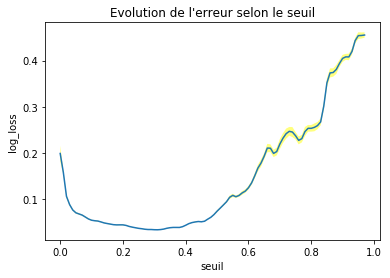

In [22]:
display_evol(g['abscisse'],smoothing(g['moyenne']),g['std'],title="Evolution de l'erreur selon le seuil",xlabel='seuil',ylabel='log_loss',savefig='errorgraph.png')

In [20]:
def display_evol(x,y,std=None,title="",xlabel="",ylabel="",savefig=None):
    plt.plot(x,y)
    if std is not None:
        plt.fill_between(x,y+std,y-std,facecolor='yellow',alpha=0.5)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    if savefig is not None:
        plt.savefig(savefig,dpi=300)
    plt.show()